# Cirrhosis Outcomes Jupyter Notebook

In [46]:
# Imports libraries/ect..

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [47]:
# Reads CSVs
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [48]:
# Test Head
test.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [49]:
# Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [50]:
# Describe
train.describe()

id       N_Days           Age    Bilirubin  Cholesterol  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   
mean      3.548323    83.902846   1816.745250   114.604602     115.340164   
std       0.346171    75.899266   1903.750657    48.790945      52.530402   
min       1.960000     4.000000    289.000000    26.350000      33.000000   
25%       3.350000    39.000000    834.000000    75.950000      84.000000   
50%       3.580000    63.000000   1181.000000   108.500000     104.000000   
75%       3.770000   102.000000   1857.000000   137.950000     139.000000   
max       4.640000   588.000000  13862.400000   457.250000     598.000000   

         Platelets  Prothrombin        Stage  
count  7905.000000  7905.000000  7905.000000  
mean    265.228969    10.629462     3.032511  
std      87.465579     0.781735     0.866511  
min      62.000000     9.000000     1.000000  
25%     211.000000    10.000000     2.000000  
50%     265.000000    10.600000     3.000000  
75%     316.000000    11.000000     4.000000  
max     563.000000    18.000000     4.000000

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'N_Days'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Bilirubin'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Copper'}>,
        <Axes: title={'center': 'Alk_Phos'}>],
       [<Axes: title={'center': 'SGOT'}>,
        <Axes: title={'center': 'Tryglicerides'}>],
       [<Axes: title={'center': 'Platelets'}>,
        <Axes: title={'center': 'Prothrombin'}>],
       [<Axes: title={'center': 'Stage'}>, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

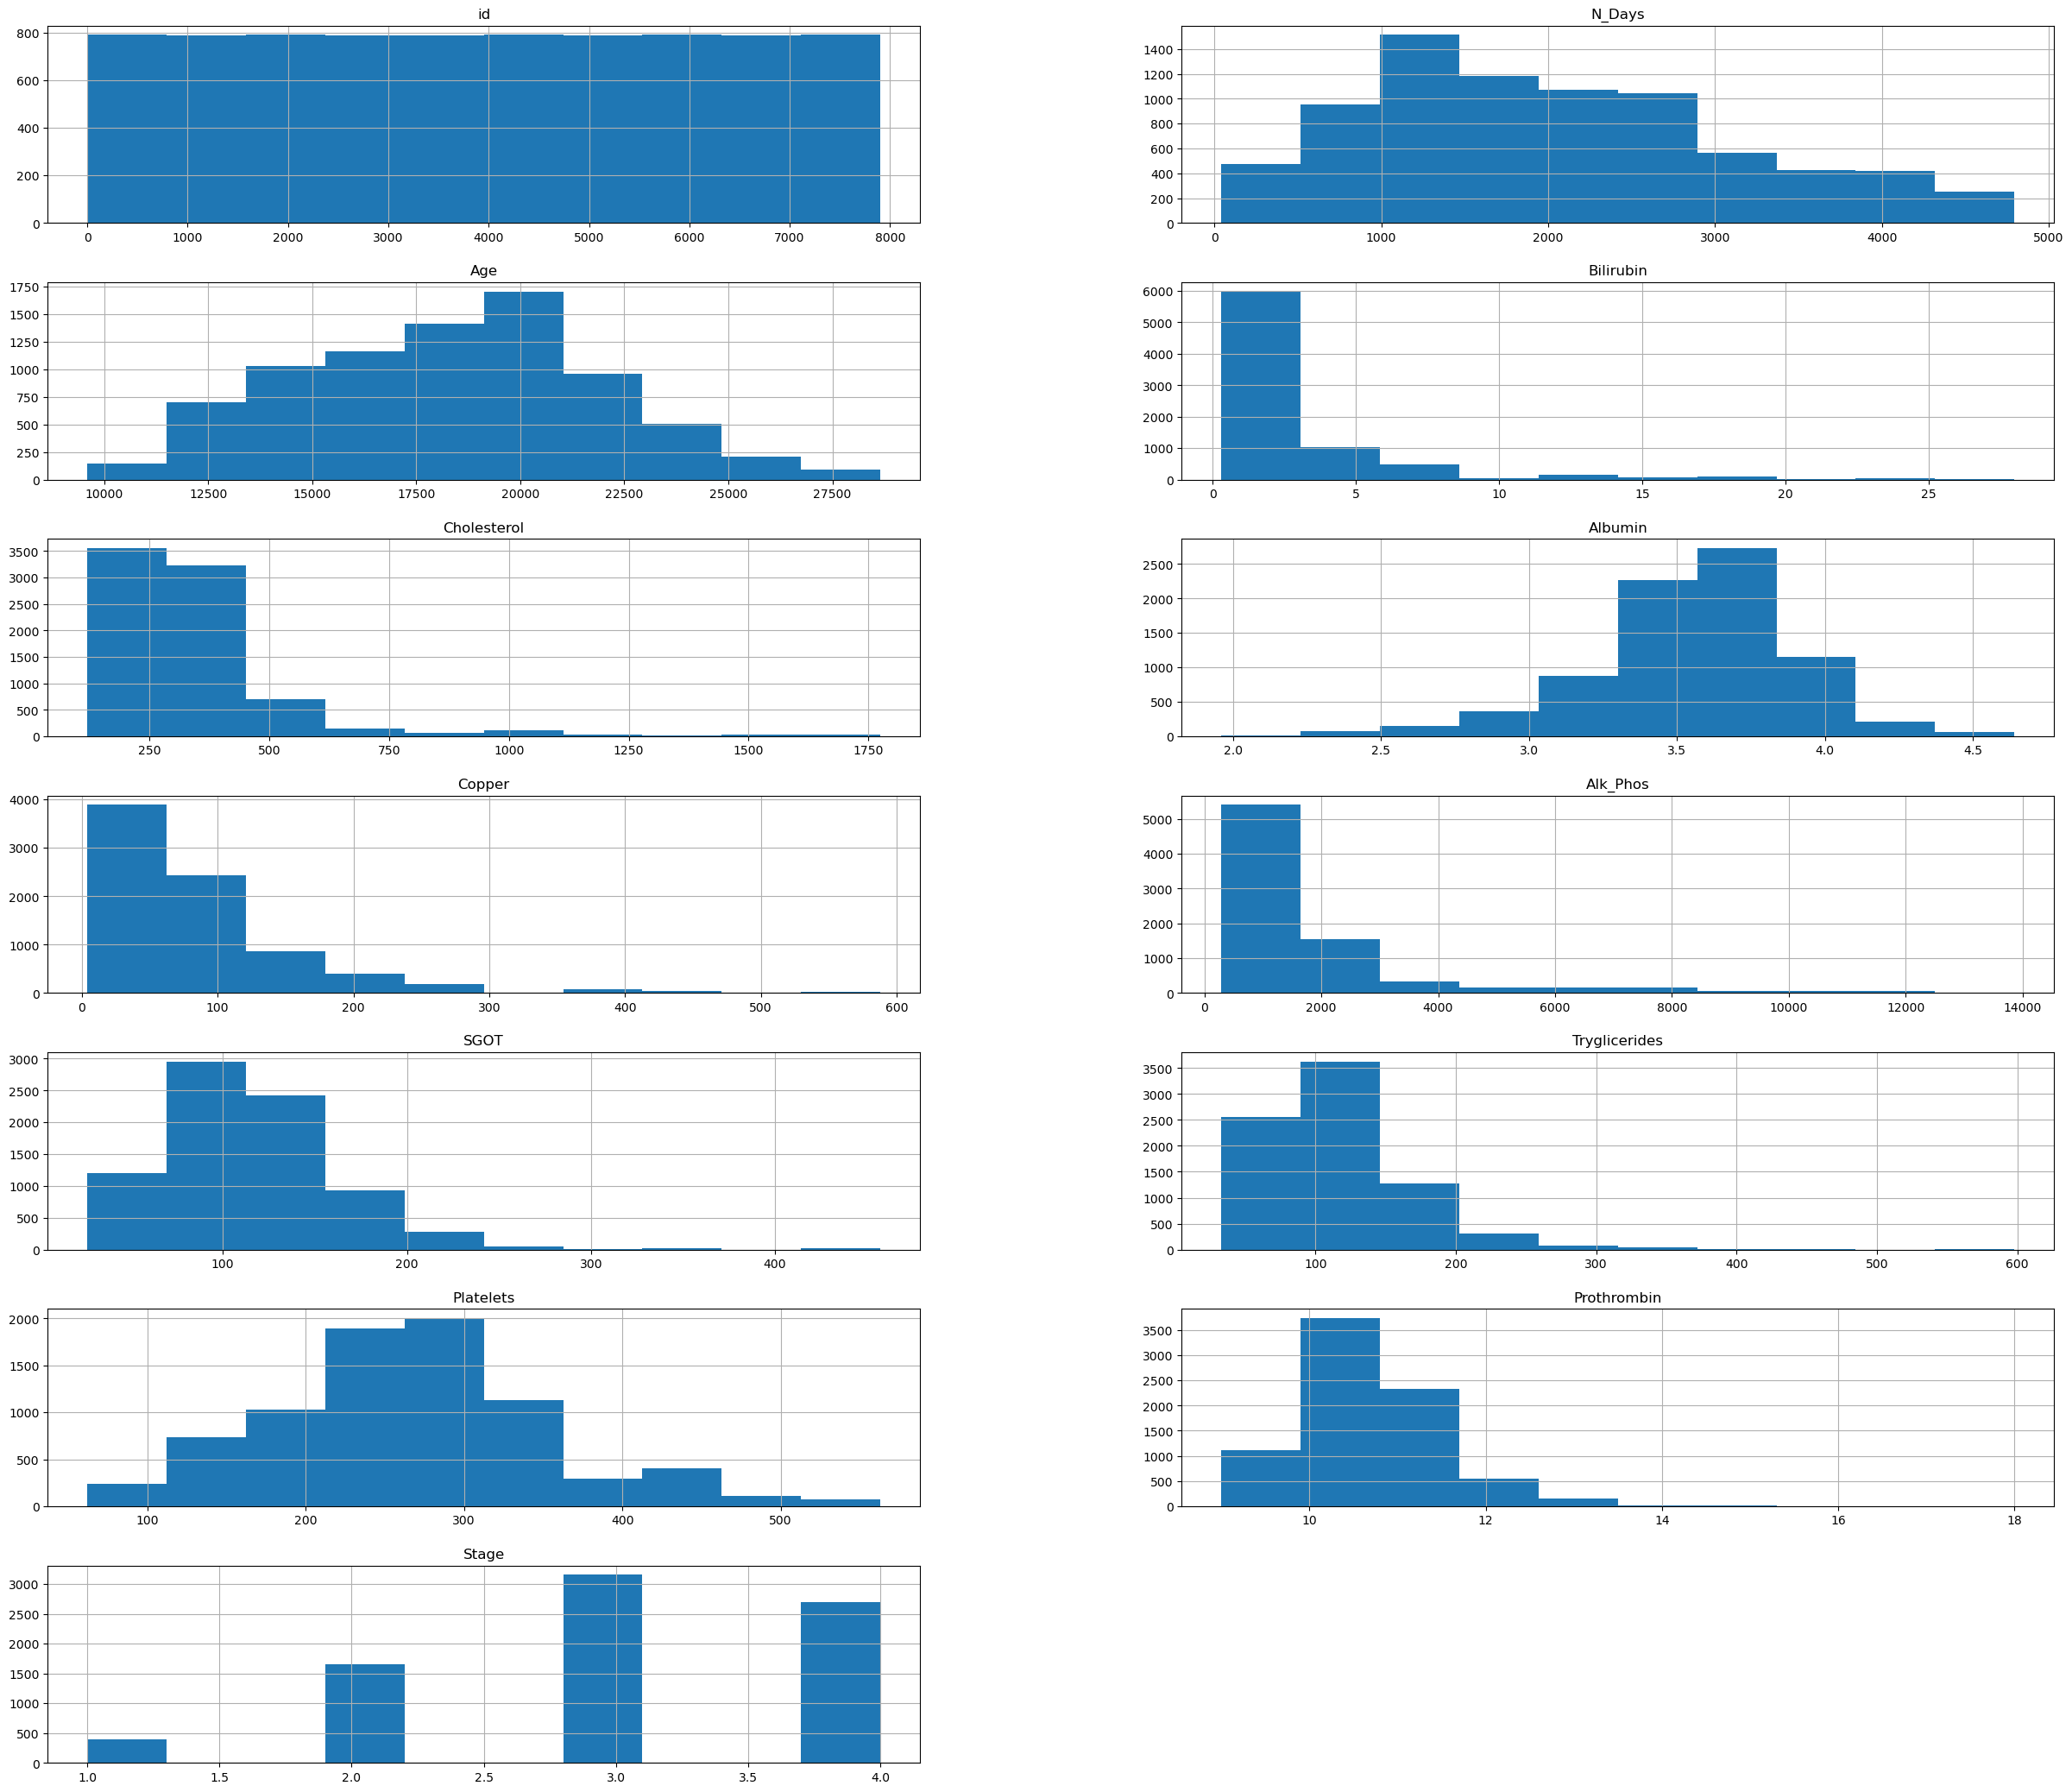

In [51]:
# Hist plots for data
train.hist(layout=(8,2), figsize=(30,30))

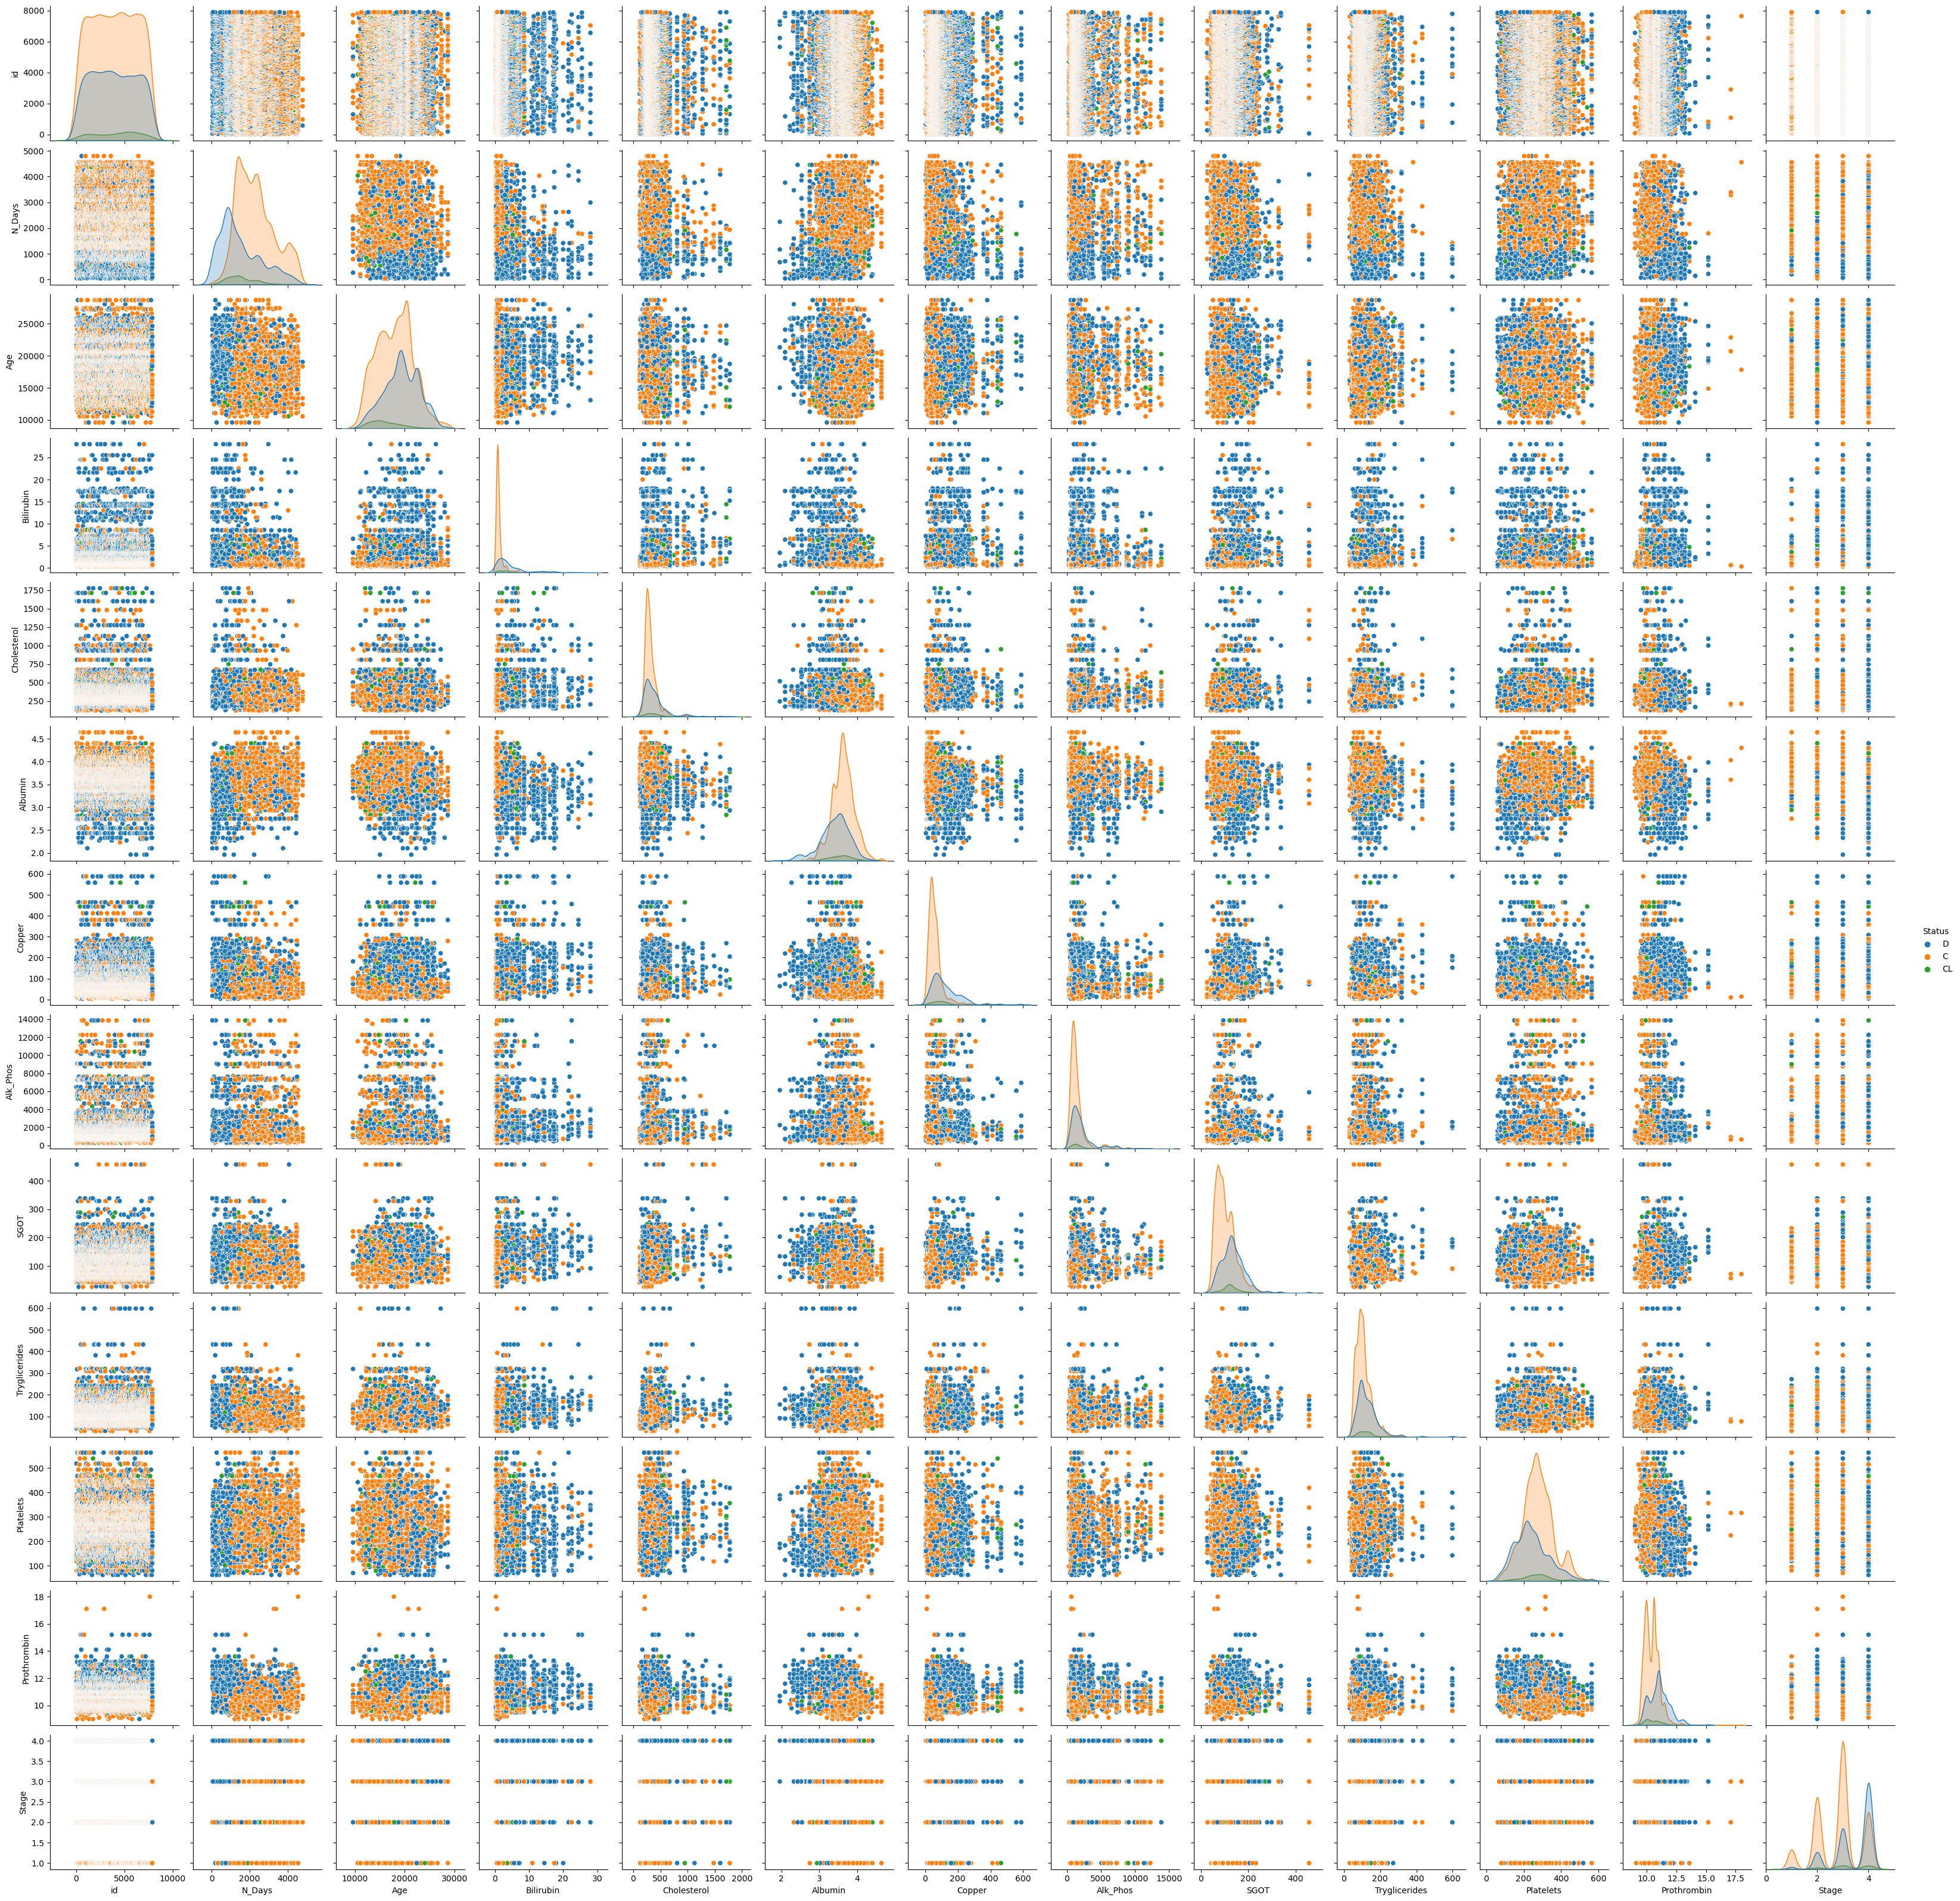

In [52]:
# View correlations of features according to health risk
sns.pairplot(train, hue= 'Status')

In [53]:
train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [54]:
#Create Test and train form train dataset
X = train.drop(columns=['Status'])
y = train['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state= 20)

In [55]:
# Display X_train head
X_train.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
7437  7437     974          Placebo  13736   F       N            Y       N   
1511  1511    1217  D-penicillamine  22369   M       N            Y       Y   
6556  6556    2692  D-penicillamine  16300   F       N            N       N   
1647  1647    1235  D-penicillamine  17512   F       N            Y       N   
1123  1123    3445          Placebo  20662   F       N            Y       Y   

     Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
7437     N        6.6        674.0     3.31   358.0    2412.0  167.40   
1511     N        2.4        448.0     3.31   123.0    1833.0  134.00   
6556     N        1.1        390.0     4.08    32.0    1509.0   88.35   
1647     N        1.1        325.0     3.31    76.0    2108.0  170.50   
1123     N        1.5        200.0     3.74    54.0     834.0  110.05   

      Tryglicerides  Platelets  Prothrombin  Stage  
7437          140.0      318.0          9.8    4.0  
1511          155.0      156.0         10.9    4.0  
6556           52.0      263.0          9.0    2.0  
1647           78.0      217.0         10.6    4.0  
1123          143.0      283.0         11.6    3.0

In [56]:
# Display y_train head
y_train.head()

7437    C
1511    D
6556    D
1647    C
1123    D
Name: Status, dtype: object

In [57]:
# One Hot Encoding for status

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_data = pd.DataFrame(enc.fit_transform(y_train[['Status']]).toarray())

enc_data.head()

KeyError: "None of [Index(['Status'], dtype='object')] are in the [index]"